# Markov Networks

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/en/7/7b/A_simple_Markov_network.png" width="400px" height="300px" />

> Until now, we have only studied **Bayesian Networks**, which are based on directed graphs. Among other features, these representations are nice because:
> - Their structure often correspond to the causality of the phenomena they are modeling.
> - Their parameters can be naturally elicited from the real-world phenomena.
> 
> Now, we will study undirected graphical models. We will see that these models are useful when modeling certain situations where one cannot assign a directionality to the interaction between variables. In addition:
> - The independence statements undirected models encode are often simpler to obtain than for the directed case.
> - The inference tasks, which we will see the next module, are formulated independently of the direction of the edges.

> **Objetivos:**
> - To describe the Markov networks representation, which is based in undirected graphs.
> - To learn how to represent Markov networks, their independence properties and their semantics.
> - To compare the the independencies that can be encoded into Markov networks to those that can be encoded in Bayesian networks.

> **Referencias:**
> 
> - Probabilistic Graphical Models: Principles and Techniques, By Daphne Koller and Nir Friedman. Ch. 4.
> - Probabilistic Graphical Models Specialization, offered through Coursera. Prof. Daphne Koller.
> - Mastering Probabilistic Graphical Models Using Python, By Ankur Ankan and Abinash Panda. Ch. 2.


<p style="text-align:right;"> Imagen recuperada de: https://upload.wikimedia.org/wikipedia/en/7/7b/A_simple_Markov_network.png.</p>

___

# 1. Overview

As usual, let's introduce today's topic with an example.

Let's assume that there are four people:
- $A$(lex)
- $B$(eatriz)
- $C$(ristina)
- $D$(aniel)

We know that:
- $A$ and $B$ are a couple,
- $C$ and $D$ are a couple,
- $A$ and $D$ are best friends,
- $C$ and $B$ are best friends, however
- $A$ and $C$ don't get along, and
- $B$ and $D$ don't get along.

So, these two couples decide to hang out some day. Once they get together, they have to decide where they want to go for dinner.

From our social expreience, we know that people who get along well can influence each other in their choices.

In this situation, we have that $A$ influences $B$, $B$ influences $C$ so that, in the end $A$ indirectly influences $C$. However, given the choices of $B$ and $D$, the choice of $A$ shouldn't affect the choice of $C$ (and viceversa). In probabilistic words: $(A \perp C | B, D)$.

Similarly, given the choices of $A$ and $C$, the choice of $B$ shouldn't affect the choice of $D$ (and viceversa). In probabilistic words: $(B \perp D | A, C)$.

If we try to model this situation using a Bayesian network, we may come up with the following graphs:

In [ ]:
from IPython.display import Image

In [ ]:
Image("figures/BNDecision.png")

**Questions:**
- What independencies are encoded by the graph of the left?
  - *Answer:* 
  
- What independencies are encoded by the graph of the right?
  - *Answer:* 

In fact, there is no Bayesian network which can encode these simple independencies $(A \perp C | B, D)$ and $(B \perp D | A, C)$, but no other.

For a further discussion about this, please refer to Example 3.8 in the main book (page 83).

On the other hand, we can easily implement these independencies using an *undirected graph* (*Markov network*).

- As in Bayesian networks, the nodes of a Markov network (MN) represent random variables.

- But different from Bayesian networks, we represent interaction between these random variables using undirected edges.

Note that the latter has the direct implication that a node has not "parents" nor "childs", then we cannot represent the relations via the CPDs

$$P(X_i | \mathrm{Pa}X_i),$$

but with general factors.

Recall the definition of factor:

> *Definition.* A **factor** $\phi(X_1, \dots, X_k)$ is a function whose arguments are values of the RVs $X_1, \dots, X_k$ and returns a nonnegative real number:
> 
> $$\phi: \mathrm{Val}(X_1, \dots, X_k) \to \mathbb{R}_{\geq 0}.$$
>
> The set of RVs $\bar{D} = \{X_1, \dots, X_k\}$ is called the **scope** of the factor $\phi$, and this is denoted as $\mathrm{scope}[\phi]=\bar{D}\{X_1, \dots, X_k\}.$

With this, we are ready to consider a model that encodes the mentioned independencies:

In [ ]:
Image("figures/MNFirst.png")

Here, are several things to note about the factors:

- The factors are not probabilities. Then, they do not need to be normalized.
- The factors are assigned to the edges **(they do not need to be assigned to only one edge though)**, not to the nodes.
- The factors represent, in a general sense, affinity functions between the variables that are in the scope of the factor.

For instance, assume that in our "couples example" the restaurant options have been reduced to two:
- Restaurant 0.
- Restaurant 1.

Then, looking for example at $\phi_1$, one can conclude that:
- $A$ and $B$ tend to agree on their restaurant selection.
- When $A$ and $B$ disagree, there is more weight for $A$ choosing Restaurant 1 and $B$ choosing Restaurant 2 than the converse.

We can come up with similar conclusions for the affinity between $B$ and $C$, $C$ and $D$, and $D$ and $A$.

For example, $\phi_3$ tells us that $C$ and $D$ strongly tend to disagree on their restaurant selection.

Now, similar to BNs, the factors in MN ecode local interactions between the variables in their scope.

On the other hand, to define the global model (the joint distribution), we use the notion of product of factors:

$$\tilde{P}(A,B,C,D) = \phi_1(A, B) \cdot \phi_2(B, C) \cdot \phi_3(C, D) \cdot \phi_4(D, A).$$

However note that $\tilde{P}$ is not a probability distribution, since it is unnormalized. The joint distribution is obtained normalizing $\tilde{P}$:

$$P(A,B,C,D) = \frac{1}{Z}\tilde{P}(A,B,C,D) = \frac{1}{Z}\phi_1(A, B) \cdot \phi_2(B, C) \cdot \phi_3(C, D) \cdot \phi_4(D, A),$$

where

$$Z = \sum_{A,B,C,D} \tilde{P}(A,B,C,D) = \sum_{A,B,C,D} \phi_1(A, B) \cdot \phi_2(B, C) \cdot \phi_3(C, D) \cdot \phi_4(D, A)$$

is a normalizing constant known as the **partition function**. The term *function* is not clear by now, because $Z$ is a constant; however, it will be clear in the learning module, because $Z$ is indeed a function of the parameters.

Let's see how to define the above factors and the probability distribution using `pgmpy`:

In [ ]:
# Import pgmpy.factors.discrete.DiscreteFactor


In [ ]:
# Define factors phi_i (i=1,2,3,4)


In [ ]:
# Print any factor


In [ ]:
# Unnormalized measure


In [ ]:
# Print unnormalized measure


In [ ]:
# Partition function


In [ ]:
# Print partition function


In [ ]:
# Joint probability distribution


In [ ]:
# Print joint prob


**Question.** Knowing all the above, the pairwise factor $\phi_1(A,B)$ is proportional to:

1. The marginal probability $P(A,B)$.
2. The conditional probability $P(A|B)$.
3. The conditional probability $P(A, B | C, D)$.
4. None of the above.

In [ ]:
# Marginal probability P(A, B)


In [ ]:
# Conditional probability P(A | B)


- From these examples, we can note that the marginal probabilities (such as $P(A,B)$) are complicated aggregates of the factors that define the MN.

- There is not a natural mapping between the probability distribution and the factors that are used to compose it. Think about the simple example above:
  
  $$P(A,B,C,D) = \frac{1}{Z}\phi_1(A, B) \cdot \phi_2(B, C) \cdot \phi_3(C, D) \cdot \phi_4(D, A).$$
  
- This, indeed, severely affects the learning procedures we will study in the third module.

___
# 2. Gibbs distributions and Markov networks

The "couples example" we considered above, is a special case of Markov networks:

> *Definition.* A **pairwise Markov network** is an undirected graph with nodes $X_1, \dots, X_n$ and each edge $X_i - X_j$ is associated with a factor $\phi_{ij}(X_i, X_j)$.

Although this class of MNs are easy to understand, since the interactions are encoded by pairs of RVs, they can only represent a very reduced class of joint distributions.

Why?

- Let's assume that have a joint distribution over $X_1,\dots, X_n$.
- Moreover, assume that $|\mathrm{Val}(X_i)| = d$ for all $i=1,\dots,n$.
- How many parameters does one need to completely specify the whole distribution without any independence assumption?
  
  $$%d^n$$
  
- Now, in a pairwise markov network we have $\left(\begin{array}{c}n \\ 2\end{array}\right)$ edges.
- We need $d^2$ parameters to specify each factor.
- In total,
  $$%\left(\begin{array}{c}n \\ 2\end{array}\right)d^2 \leq (e/2)^2 n^2 d^2$$
  
Inequality from: https://www.johndcook.com/blog/2008/11/10/bounds-on-binomial-coefficients/

Then, **we cannot encode every distribution with pairwise MN**.

How do we increase the expressive power of the MN?

- .

## 2.1 General Gibbs distributions

Following the discussion above, we would like to generate networks using general factors, i.e. factors whose scope may contain 2 or more RVs:

$$\phi_i(\bar{D}_i),$$

where $|\bar{D}_i|$ can be $1$, $2$, $3$ or more.

> *Definition*. A distribution $P_{\Phi}$ is a **Gibbs distribution** parameterized by a set of factors $\Phi = \{\phi_1(\bar{D}_1), \dots, \phi_k(\bar{D}_k)\}$ if it is defined as:
>
> $$P_{\Phi}(X_1, \dots, X_n) = \frac{1}{Z} \tilde{P}_{\Phi}(X_1, \dots, X_n),$$
>
> where
> 
> $$\tilde{P}_{\Phi}(X_1, \dots, X_n) = \prod_{i=1}^k \phi_i(\bar{D}_i),$$
>
> is an unnormalized measure and
>
> $$Z = \sum_{X_1,\dots,X_n} \tilde{P}_{\Phi}(X_1, \dots, X_n)$$
>
> is a normalizing constant called the **partition function**.

Note that, in principle, a Gibbs distribution is not related to an undirected graph. However, it indeed induces a special undirected graph as follows:

- If we have a set of factors $\Phi = \{\phi_1(\bar{D}_1), \dots, \phi_k(\bar{D}_k)\}$ corresponding to a Gibbs distribution, 
- the induced Markov network $\mathcal{H}_{\Phi}$ has an edge $X_i - X$ whenever there exists a factor $\phi_i\in\Phi$ such that $X_i, X_j \in \mathrm{scope}[\phi_i]$.

**Markov Networks (MN) are also known as Markov Random Fields (MRF)**.

**Example.** We have three factors

$$\phi_1(A,B,C)$$

$$\phi_2(C, D)$$

$$\phi_3(D)$$

What is the induced MN structure of these three factors?

In [ ]:
# First solve, then show (InducedMN)


This, in turn induces the concept of factorization of a distribution over a MN:

> *Definition.* We say that a distribution $P$ factorizes over $\mathcal{H}$ if there exists $\Phi = \{\phi_1(\bar{D}_1), \dots, \phi_k(\bar{D}_k)\}$ such that $P=P_{\Phi}$.
>
> Note that $\mathcal{H}=\mathcal{H}_{\Phi}$ is the graph induced by $\Phi$.

One important thing to note is that the same MN structure $\mathcal{H}$ can be induced by different sets of factors.

**Example**

- Which MN structure induces the factors $\phi_1(A, B, D)$ and $\phi_2(B, C, D)$?
- Which MN structure induces the factors $\phi_1(A, B)$, $\phi_2(B, C)$, $\phi_3(C,D)$, $\phi_4(A,D)$, and $\phi_5(B,D)$?
- Which MN structure induces the factors $\phi_1(A, B, D)$, $\phi_2(B, C)$, and $\phi_3(C,D)$?

In [ ]:
# First solve, then show (InducedMN2)


**How does the probabilistic influence flows in a MN?**

The probabilistic influence can flow along any trail of the graph, regardless the form of the factors.

> *Definition.* We say that a trail $X_1 - \dots - X_k$ is **active given $\bar{Z}$** if no $X_i$ in the trail is in $\bar{Z}$.

**Example**

1. Which of the following independence assertions hold in the next graph?

   - $(A \perp D | B)$
   - $(A \perp D | C)$
   - $(B \perp D | C)$

In [ ]:
Image("figures/InducedMN.png")

2. Which of the following independence assertions hold in the next graph?

   - $(A \perp D | B)$
   - $(A \perp D | B, C)$
   - $(A \perp C | B)$
   - $(A \perp C | B, D)$

In [ ]:
Image("figures/InducedMN2.png")

Finally, how do we define a MN in `pgmpy`?

- We use the couples example MN:

In [ ]:
Image("figures/MNFirst.png")

In [ ]:
# Import pgmpy.models.MarkovModel


In [ ]:
# Define MN skeleton (edges)


In [ ]:
# Add factors


In [ ]:
# Which independencies do the model encode?


## 2.2 Conditional random fields

A popular application of MNs is classification. For this application, however, one does not try to model the joint distribution $P(Y, X_1, \dots, X_n)$ but the conditional distribution $P(Y|X_1,\dots,X_n)$.

**Why not only use a BN?**

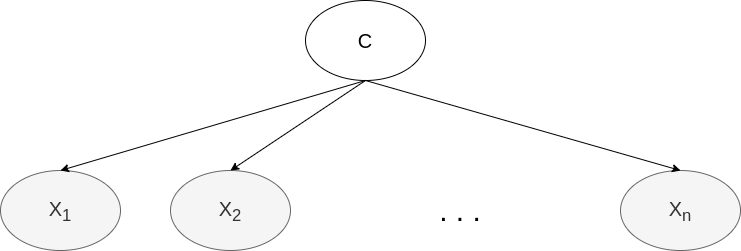

In [53]:
Image("figures/NaiveBayes.png")

Recall that the above model assumes that:

$$(X_i \perp X_j | C), \quad \forall i,j\in\{1,\dots,n\}, \quad i\neq j$$

What if $X_i$ and $X_j$ are very correlated?

- For example, you would like to perform a segmentation classifier over certain customers population for a marketing campaign. Between the variables you have for describing the customers, there are the $J$(ob) and the $I$(ncome). Do you really have that $(J \perp I | C)$?

Naive Bayes model often leads to incorrect independence assumptions.

You may add edges to capture these correlations, but in that case the model will become dense (in both connections and parameterization).

**Conditional Random Fields (CRF) representation**

Instead of modeling the joint distribution $P(\bar{X}, \bar{Y})$, we model the conditional distribution $P(\bar{Y}|\bar{X})$.

- In this scheme, we don't care about the independencies/dependencies in $\bar{X}$.

Formally,

> *Definition.* A **conditional random field (CRF)** is an undirected graph $\mathcal{H}$ whose nodes correspond to $\bar{X}\cup\bar{Y}$, parameterized by a set of factors $\Phi = \{\phi_1(\bar{D}_1), \dots, \phi_k(\bar{D}_k)\}$, such that $\bar{D}_i\not\subset\bar{X}$. This network encodes a conditional probability distribution as follows
>
> $$P(\bar{Y}|\bar{X}) = \frac{1}{Z(\bar{X})} \tilde{P}(\bar{Y}, \bar{X}),$$
>
> 
> $$\tilde{P}(\bar{Y}, \bar{X}) = \prod_{i=1}^k \phi_i(\bar{D}_i),$$
>
>
> $$Z(\bar{X}) = \sum_{\bar{Y}} \tilde{P}(\bar{Y}, \bar{X}).$$
>
> In the graph $\mathcal{H}$, two variables are connected whenever they appear together in the scope of some factor.

Note that:

1. The differences with respect to the Gibbs distribution are subtle. It is only that the partition function is now $Z(\bar{X}) = \sum_{\bar{Y}} \tilde{P}(\bar{Y}, \bar{X}).$

2. Unlike the definition of the naive Bayes network, the graph of a CRF may still contain edges between variables in $\bar{X}$. However, these edges do not encode the structure of a distribution over $\bar{X}$, since the network does not encode such distribution.

**Logistic regression as CRFs**

Consider a CRF:

- Over the binary RVs $\bar{X}=\{X_1, \dots, X_n\}$ and $\bar{Y} = \{Y\}$.

- There are pairwise edges between $Y$ and each $X_i$.

- The factors are defined as:
  
  $$\phi_i(Y, X_i)=\exp(w_i \boldsymbol{1}\{X_i=1, Y=1\}),$$
  
  where $w_i\in\mathbb{R}$ and $\boldsymbol{1}$ stands for the indicator function.
  
- Moreover, there is a single-node factor $\phi_0(Y)=\exp(w_0 \boldsymbol{1}\{Y=1\})$.
  
As a part of the homework, you will show that the conditional probability distribution this CRF encodes corresponds to the logistic regression distribution:

$$P(Y=1 | \bar{x}) = \frac{\exp\left(w_0 + \sum_{i=1}^{n} w_i x_i\right)}{1 + \exp\left(w_0 + \sum_{i=1}^{n} w_i x_i\right)}$$

In [ ]:
Image("figures/LogisticCRF.png")

## 2.3. Independencies in MNs

In Bayesian networks, we saw that there is an equivalence between the notions of independence and factorization of the distribution.

It happens that this property also holds for Markov networks, under some additional requirement.

### Factorization $\Rightarrow$ Independence

> *Theorem.* If $P$ factorizes over $\mathcal{H}$, then $\mathcal{H}$ is an I-map for $P$.

### Independence $\Rightarrow$ Factorization

> *Theorem.* **Let $P$ be a positive distribution**. If $\mathcal{H}$ is an I-map for $P$, then $P$ factorizes over $\mathcal{H}$.

___
# 3. Local structure in MNs

We already have seen in the last session some local structures for Bayesian networks. Now, we will se some structures for MN.

## 3.1. Log-linear models

We often use the tabular representation of the factors due to its simplicity and ease of interpretation.

On the other hand, we have already discussed that this tables lead, in many cases, to intractable representations.

An important class of representation is achieved parameterizing factors in the log-space.

To be more precise, we can rewrite a factor $\phi(\bar{D})$ as:

$$\phi(\bar{D}) = \exp(-\epsilon(\bar{D})),$$

where $\epsilon(\bar{D}) = -\ln(\phi(\bar{D}))$.

Recall that our original representation of the unnormalized measure is:

$$\tilde{P}(X_1,\dots,X_n) = \prod_{i}\phi_i(\bar{D}_i).$$

Hence, in the logarithmic representation we have:

$$\tilde{P}(X_1,\dots,X_n) = \exp\left(-\sum_{i}\epsilon_i(\bar{D}_i)\right).$$

- The exponential function guarantees that $\tilde{P}$ is positive no matter the signum of $\epsilon_i$.
- Thus, the terms $\epsilon_i$ are similar to factors, but without the nonnegativity requirement.

Often, the $\epsilon_i$ terms are decomposed as $\epsilon_i(\bar{D}_i) = w_i f_i(\bar{D}_i)$, where $w_i \in \mathbb{R}$ and $f_i$ are called features.

> *Definition.* A **feature** $f(\bar{D})$ is a function $f: \mathrm{Val}(\bar{D}) \to \mathbb{R}$.

As mentioned above, a feature is no more than a factor without the nonnegativity requirement.

One important feature, as we saw in the CRFs example, is the *indicator feature*, that takes the value $1$ for some values $\bar{x}\in\bar{D}$ and $0$ otherwise.

Now, we are ready to define log-linear models:

> *Definition.* A distribution $P$ is a **log-linear model** over a Markov network $\mathcal{H}$ if it is associated with:
> 
> - a set of features $\mathcal{F} = \{f_1(\bar{D}_1), \dots, f_k(\bar{D}_k)\}$, and
> - a set of weights $w_1, \dots, w_k$,
>
> such that
>
> $$P(X_1, \dots, X_n) = \frac{1}{Z}\exp\left(-\sum_{i=1}^{k} w_i f_i(\bar{D}_i)\right).$$

Note, in the above definition, that:

- Each feature $f_i$ has its own scope $\bar{D}_i$.
- Different features can have the same scope.
- Log-linear models provide a compact representation for many distributions.

**How general are log-linear models?**

Consider, for example the factor $\phi(X_1, X_2)$

| $X_1$   | $X_2$   | $\phi$   |
| ------- | ------- | -------- |
| $x_1^0$ | $x_2^0$ | $a_{00}$ |
| $x_1^0$ | $x_2^1$ | $a_{01}$ |
| $x_1^1$ | $x_2^0$ | $a_{10}$ |
| $x_1^1$ | $x_2^1$ | $a_{10}$ |


Let the features $f_{12}^{kl}(X_1, X_2)$ be defined by:

$$f_{12}^{kl} (X_1, X_2) = \boldsymbol{1}\{X_1=x_1^k, X_2=x_2^k\}, \quad \mathrm{ for } \quad k,l=0,1.$$

Thus, the above tabular factor can be represented as:

$$\phi(X_1,X_2) = \exp\left(-\sum_{k,l\in\{0,1\}} w_{kl}f_{12}^{kl} (X_1, X_2)\right),$$

with $w_{kl} = -\ln(a_{kl}).$

Following the above procedure, we can express every tabular factor (every discrete distribution) in terms of a log-linear model.

In this sense, we say that log-linear models are a **general representation**.

**What is the advantage, then?**

If both representations are equivalent, then there seems to be no advantage of selecting one or another.

We already discussed sharing between and inside models in the context of Bayesian networks. The advantage of log-linear models is that they allow us to represent these parameter similarities much mode directly.

This is very important, because in undirected models, parameters are much more difficult to elicit.

For example, let's consider **Ising models**.

___
- Ising models are one of the earliest types of MRFs. It's a pairwise MN.
- They arose in statistical physics as a model for the energy of a physical system involving a system of interacting atoms.
- In these systems, each atom is associated with a binary RV $X_i$ with $\mathrm{Val}(X_i)\{-1,+1\}$, whose value defines the direction of the atom's spin.
- The energy function associated with the edges is given by the symmetric function:

  $$\epsilon_{i,j}(x_i,x_j) = w_{i,j}x_ix_j$$

- The total energy is:
  
  $$E(x_1,\dots,x_n) = \sum_{i<j} w_{i,j}x_ix_j + \sum_i u_ix_i,$$
  
  where the terms $u_ix_i$ account for individual node potentials.
  
- When $w_{i,j}>0$ the model prefers spins of the atoms $i$ and $j$ aligned. The interaction is called ferromagnetic.

- When $w_{i,j}<0$ the interaction is antiferromagnetic.

- This model can be used to answer questions about the probability of atom's spin directions, usually as the number of atoms tends to infinity.
___

In the Ising model, described by the distribution

$$P(X_1,...,X_n) = \frac{1}{Z}\exp\left(-E(X_1,\dots,X_n)\right)$$

it is common to assume the same weight for every adjacent pair

$$w_{i,j}=w, \quad \forall i,j.$$

Hence we would only need $n+1$ parameters to describe this distribution, instead of $2^n$.

# Announces

## 1. Homework 3, due on Monday.

## 2. Quiz the next class.

## 3. You can see your grades in the following [link](https://docs.google.com/spreadsheets/d/1V3LqNTb4GpaLjAbDs_S9JVW_yy3Qt0wsz5vFs-NtksA/edit?usp=sharing).

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>